In [7]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
from models_v2 import *

# BilinearSampler Test Field

In [113]:
def mesh(H, W):
    x, y= torch.arange(W), torch.arange(H)
    x = x.unsqueeze(0).repeat(H, 1)
    y = y.unsqueeze(1).repeat(1, W)
    xy = torch.stack((x/((W-1)/2)-1, y/((H-1)/2)-1 ), -1)
    return xy


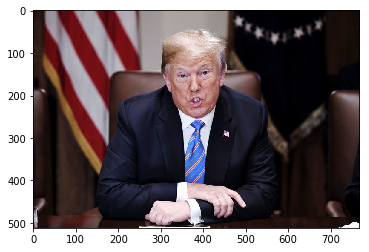

In [4]:
pimg = plt.imread('img/donald-trump-threatens-ex-obama-officials.jpg')
plt.imshow(pimg); plt.show()

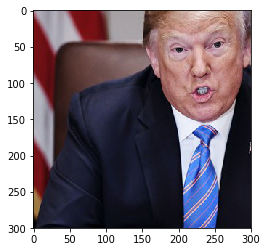

In [5]:
pimg = pimg[100:400, 150:450]
plt.imshow(pimg); plt.show()

In [6]:
timg = torch.from_numpy(pimg).type(torch.FloatTensor).permute(2,0,1)

pimg[:,:,0] - timg[0] 


    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 300x300]

## Creat the Mesh

In [20]:
xy = mesh(300,300); xy.shape

torch.Size([300, 300, 2])

In [21]:
simg = F.grid_sample( timg.unsqueeze(0), xy.unsqueeze(0))

In [22]:
(torch.abs(timg-simg.data)).sum()

3.765287270769477

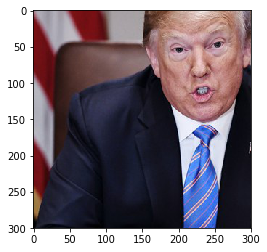

In [23]:
plt.imshow(simg.squeeze(0).permute(1,2,0).data.numpy()/255 ); plt.show()

## Funny Flip

In [24]:
xy[0,0], xy[-1, -1]
x, y = xy[:,:,0], xy[:,:,1]
xy = torch.stack((y,x),-1)

In [25]:
simg = F.grid_sample( timg.unsqueeze(0), xy.unsqueeze(0))

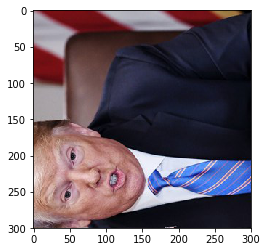

In [26]:
plt.imshow(simg.squeeze(0).permute(1,2,0).data.numpy()/255 ); plt.show()

## Test it with all zero (just sample the middle)

In [27]:
zeros = torch.zeros_like(xy.unsqueeze(0))

In [28]:
simg = F.grid_sample( timg.unsqueeze(0), zeros)

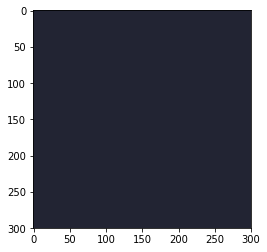

In [29]:
plt.imshow(simg.squeeze(0).permute(1,2,0).data.numpy()/255 ); plt.show()

In [1]:
from models import BilinearProj

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
sampler = BilinearProj()

In [114]:
def mesh2(H, W):
    x, y= torch.arange(W), torch.arange(H)
    x = x.unsqueeze(0).repeat(H, 1)
    y = y.unsqueeze(1).repeat(1, W)
    #xy = torch.stack((x/((W-1)/2)-1, y/((H-1)/2)-1 ), -1)
    return x, y

In [12]:
x.shape

torch.Size([300, 300])

In [11]:
x, y= mesh2(300,300)
sampled = sampler(timg.unsqueeze(0), x.unsqueeze(0), y.unsqueeze(0))

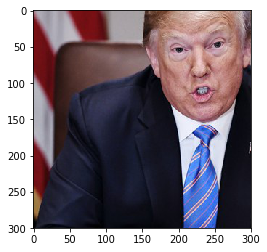

In [14]:
plt.imshow(sampled.squeeze(0).permute(1,2,0).data.numpy()/255 ); plt.show()

In [9]:
H, W = 30, 30

In [3]:
offset = Offset()

In [31]:
EPS = 1e-10

In [32]:
pose = V(torch.zeros(1,6)) + EPS

In [22]:
inv_depth = V(torch.ones(1, 1, H, W))

In [23]:
camera = V(torch.FloatTensor(np.array([372.106469,368.444783,314.357737,88.265872]))).view(1, -1)

In [33]:
tx, ty, dmask= offset.forward(pose, inv_depth, camera)

In [38]:
tx.shape

torch.Size([1, 30, 30])

In [40]:
tx[0,:3, :3]

Variable containing:
 0  1  2
 0  1  2
 0  1  2
[torch.cuda.FloatTensor of size 3x3 (GPU 0)]

In [39]:
ty[0,:3, :3]

Variable containing:
 0  0  0
 1  1  1
 2  2  2
[torch.cuda.FloatTensor of size 3x3 (GPU 0)]

In [42]:
dmask[0,:3, :3]

Variable containing:
 1  1  1
 1  1  1
 1  1  1
[torch.cuda.FloatTensor of size 3x3 (GPU 0)]

In [89]:
torch.sin(torch.FloatTensor([3.14/2]))


 1.0000
[torch.FloatTensor of size 1]

In [82]:
pose = V(torch.FloatTensor(np.array((EPS, EPS, 3.14/2, 0, 0, 0))).view(1, -1))

In [83]:
tx, ty, dmask= offset.forward(pose, inv_depth, camera)

In [91]:
ty[0, :3, :3]

Variable containing:
-223.0686 -222.0785 -221.0883
-223.0678 -222.0777 -221.0875
-223.0670 -222.0769 -221.0867
[torch.cuda.FloatTensor of size 3x3 (GPU 0)]

In [92]:
tx[0, :3, :3]

Variable containing:
 403.2505  403.2513  403.2520
 402.2405  402.2413  402.2421
 401.2306  401.2314  401.2322
[torch.cuda.FloatTensor of size 3x3 (GPU 0)]

In [98]:
import torch.nn as nn
from torch.autograd import Variable

In [99]:
class Twist2Mat(nn.Module):
    def __init__(self):
        super(Twist2Mat, self).__init__()
        self.register_buffer('o', torch.zeros(1,1))
        self.register_buffer('E', torch.eye(3))

    def cprodmat_batch(self, a_batch):
        batch_size, _ = a_batch.size()
        o = Variable(self.o).expand(batch_size, 1)
        a0 = a_batch[:, 0:1]
        a1 = a_batch[:, 1:2]
        a2 = a_batch[:, 2:3]
        return torch.cat((o, -a2, a1, a2, o, -a0, -a1, a0, o), 1).view(batch_size, 3, 3)

    def forward(self, twist_batch):
        batch_size, _ = twist_batch.size()
        rot_angle = twist_batch.norm(p=2, dim=1).view(batch_size, 1).clamp(min=1e-5)
        # rot_axis = twist_batch / rot_angle.expand(batch_size, 3)
        rot_axis = twist_batch / rot_angle
        A = self.cprodmat_batch(rot_axis)
        return Variable(self.E).view(1, 3, 3).expand(batch_size, 3, 3)\
            + A*rot_angle.sin().view(batch_size, 1, 1).expand(batch_size, 3, 3)\
            + A.bmm(A)*((1-rot_angle.cos()).view(batch_size, 1, 1).expand(batch_size, 3, 3))

In [101]:
type(pose)

torch.autograd.variable.Variable

In [106]:
t2m = Twist2Mat().cuda()

In [107]:
type(t2m.E) 

torch.cuda.FloatTensor

In [108]:
t2m(pose)

Variable containing:
(0 ,.,.) = 
  7.9626e-04 -1.0000e+00  1.2734e-10
  1.0000e+00  7.9626e-04 -5.0696e-14
 -5.0696e-14  1.2734e-10  1.0000e+00
[torch.cuda.FloatTensor of size 1x3x3 (GPU 0)]

In [110]:
pose.size()

torch.Size([1, 6])

In [112]:
rot_vec = pose[:, :3]
offset.rot_vec2mat(rot_vec)

Variable containing:
(0 ,.,.) = 
  7.9626e-04 -1.0000e+00  5.0696e-14
  1.0000e+00  7.9626e-04  1.2734e-10
 -5.0696e-14  1.2734e-10  1.0000e+00
[torch.cuda.FloatTensor of size 1x3x3 (GPU 0)]

In [ ]:
x, y = mesh2(H, W)


In [ ]:
# equvalent statement! but the one below save computation
xyz = R_batch[:, :, 0:2].bmm(xy.view(1, 2, N).expand(batch_size, 2, N))\
    + R_batch[:, :, 2:3].expand(batch_size, 3, N)\
    + t_batch.view(batch_size, 3, 1).expand(batch_size, 3, N) * inv_depth.view(-1, 1, N).expand(batch_size, 3, N)
z = xyz[:, 2:3, :].clamp(min=1e-10)
xy_warp = xyz[:, 0:2, :] / z.expand(batch_size, 2, N)
# u_warp = ((xy_warp[:, 0, :]*self.camparams['fx'] + self.camparams['cx'])/2**level_idx - .5).view(batch_size, N)
# v_warp = ((xy_warp[:, 1, :]*self.camparams['fy'] + self.camparams['cy'])/2**level_idx - .5).view(batch_size, N)
# print(self.x_pyramid[level_idx][0])
u_warp = ((xy_warp[:, 0, :] * self.camparams['fx'] + self.camparams['cx']) - getattr(self, 'x_'+str(level_idx))[0]).view(
    batch_size, N) / 2 ** level_idx
v_warp = ((xy_warp[:, 1, :] * self.camparams['fy'] + self.camparams['cy']) - getattr(self, 'y_'+str(level_idx))[0]).view()/2 ** level_idx


# testing the loss function

## SSIM loss test

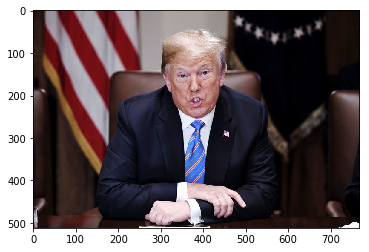

In [4]:
pimg = plt.imread('img/donald-trump-threatens-ex-obama-officials.jpg')
plt.imshow(pimg); plt.show()

In [78]:
timg = torch.from_numpy(pimg).type(torch.FloatTensor).permute(2,0,1)/255.0
timg = timg.unsqueeze(0).cuda()
mask = torch.ones_like(timg)

noise = torch.randn(timg.size()).cuda()

In [79]:
type(noise)

torch.cuda.FloatTensor

In [80]:
#noise = Variable(noise, requires_grad=True)
noise = nn.Parameter(noise)

In [81]:
noise.requires_grad

True

In [82]:
opt = optim.Adam([noise], lr=0.01)

In [83]:
loss

Variable containing:
 0.4957
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


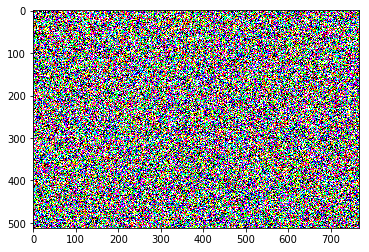

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


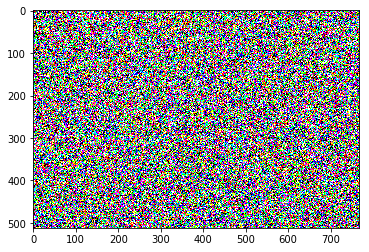

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


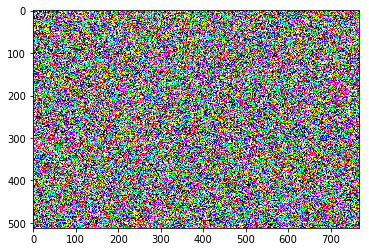

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


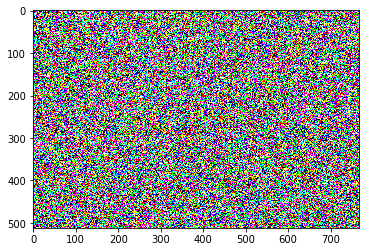

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


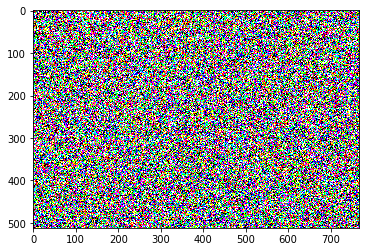

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


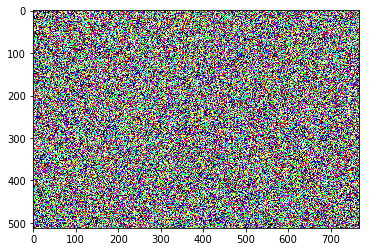

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


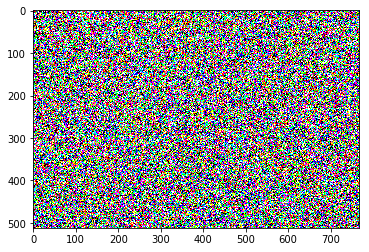

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


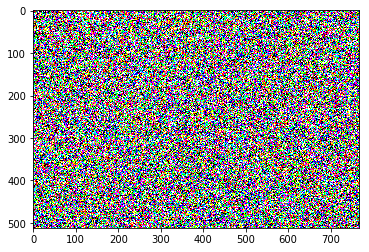

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


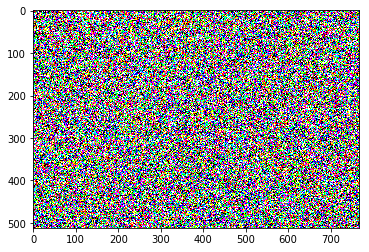

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


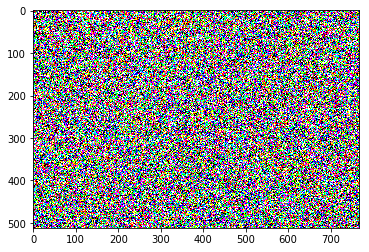

In [85]:
for i in range(10):
    opt.zero_grad()
    loss = ssim_loss( noise, V(timg), V(mask) )
    loss.backward()
    opt.step()
    plt.imshow(noise.cpu().data[0].permute(1,2,0).numpy()*255);
    plt.show()